In [ ]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import random

sys.path.append(str(Path("..").resolve()))
from src import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualize the `NoisyDataset` Dataset

In [24]:
frames_per_patch=16
dataset = NoisyDataset("oabf_astro", frames_per_patch=frames_per_patch, augument=False, max_frames=100)
cprint("The dataset has", len(dataset), "samples")

The dataset has 68 samples


In [25]:
idx = random.randrange(0, len(dataset))
even, odd = dataset[idx]
assert even.size(0) == frames_per_patch
even.shape, odd.shape

(torch.Size([16, 512, 512]), torch.Size([16, 512, 512]))

Even frames:


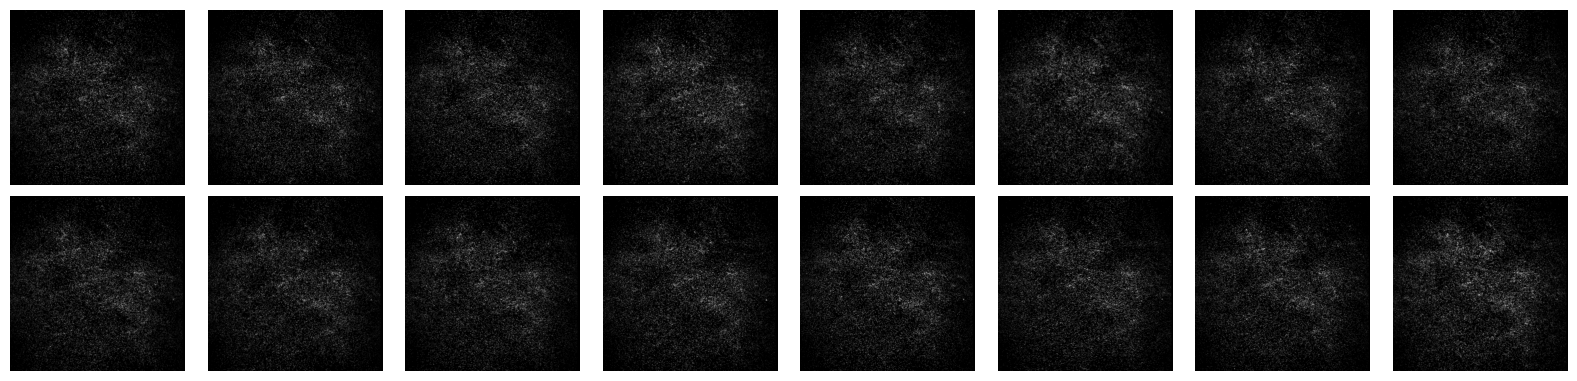

Odd frames:


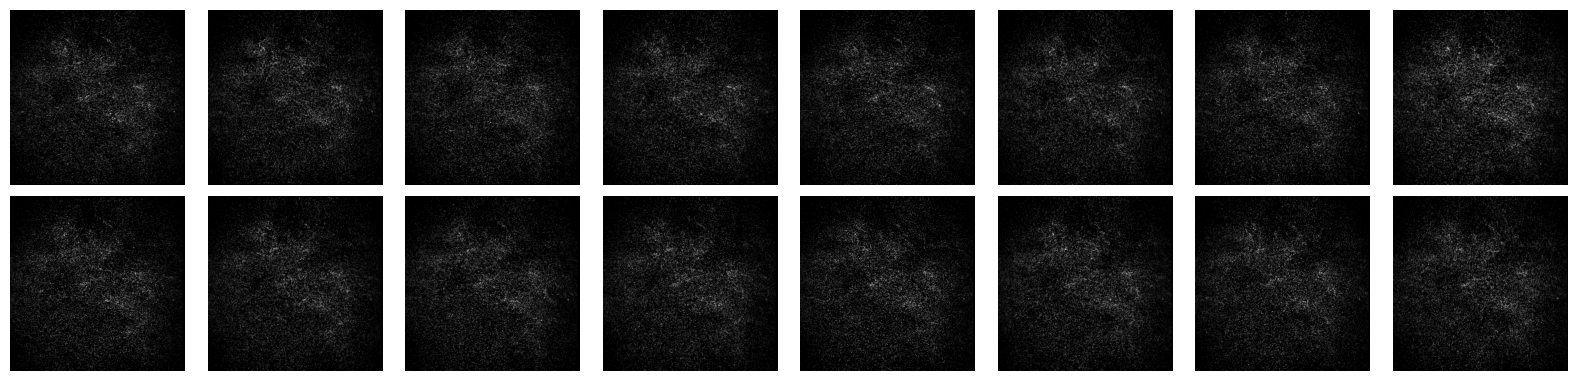

In [29]:
cprint("green:Even frames:")
imshow([_.numpy() for _ in even], cmap="grey", size=2,cols=8)
cprint("red:Odd frames:")
imshow([_.numpy() for _ in odd], cmap="grey", size=2,cols=8)